In [1]:
import datetime as dt
import numpy as np
from mtgoScraper import *

queryFormat = "standard"

if __name__ == "__main__":
    endDate = dt.datetime.today()
    startDate = endDate - dt.timedelta(weeks=1)

    startMonth = dt.datetime(startDate.year, startDate.month, 1)
    endMonth = dt.datetime(endDate.year, endDate.month, 1)
    months = pd.date_range(start=startMonth, end=endMonth, freq="MS")

    startDate = dt.date(startDate.year, startDate.month, startDate.day)

    rawDeckLists = []
    for month in months:
        monthList = mtgoScrape.formatDeckList(queryFormat, month.year, month.month)
        rawDeckLists += monthList

    skipUrls = []

    urlList = [
        x["url"]
        for x in rawDeckLists
        if x["url"] not in skipUrls
        if x["date"] >= startDate
    ]

    deckList = mtgoScrape.mtgoScrapeMain(urlList, queryFormat)

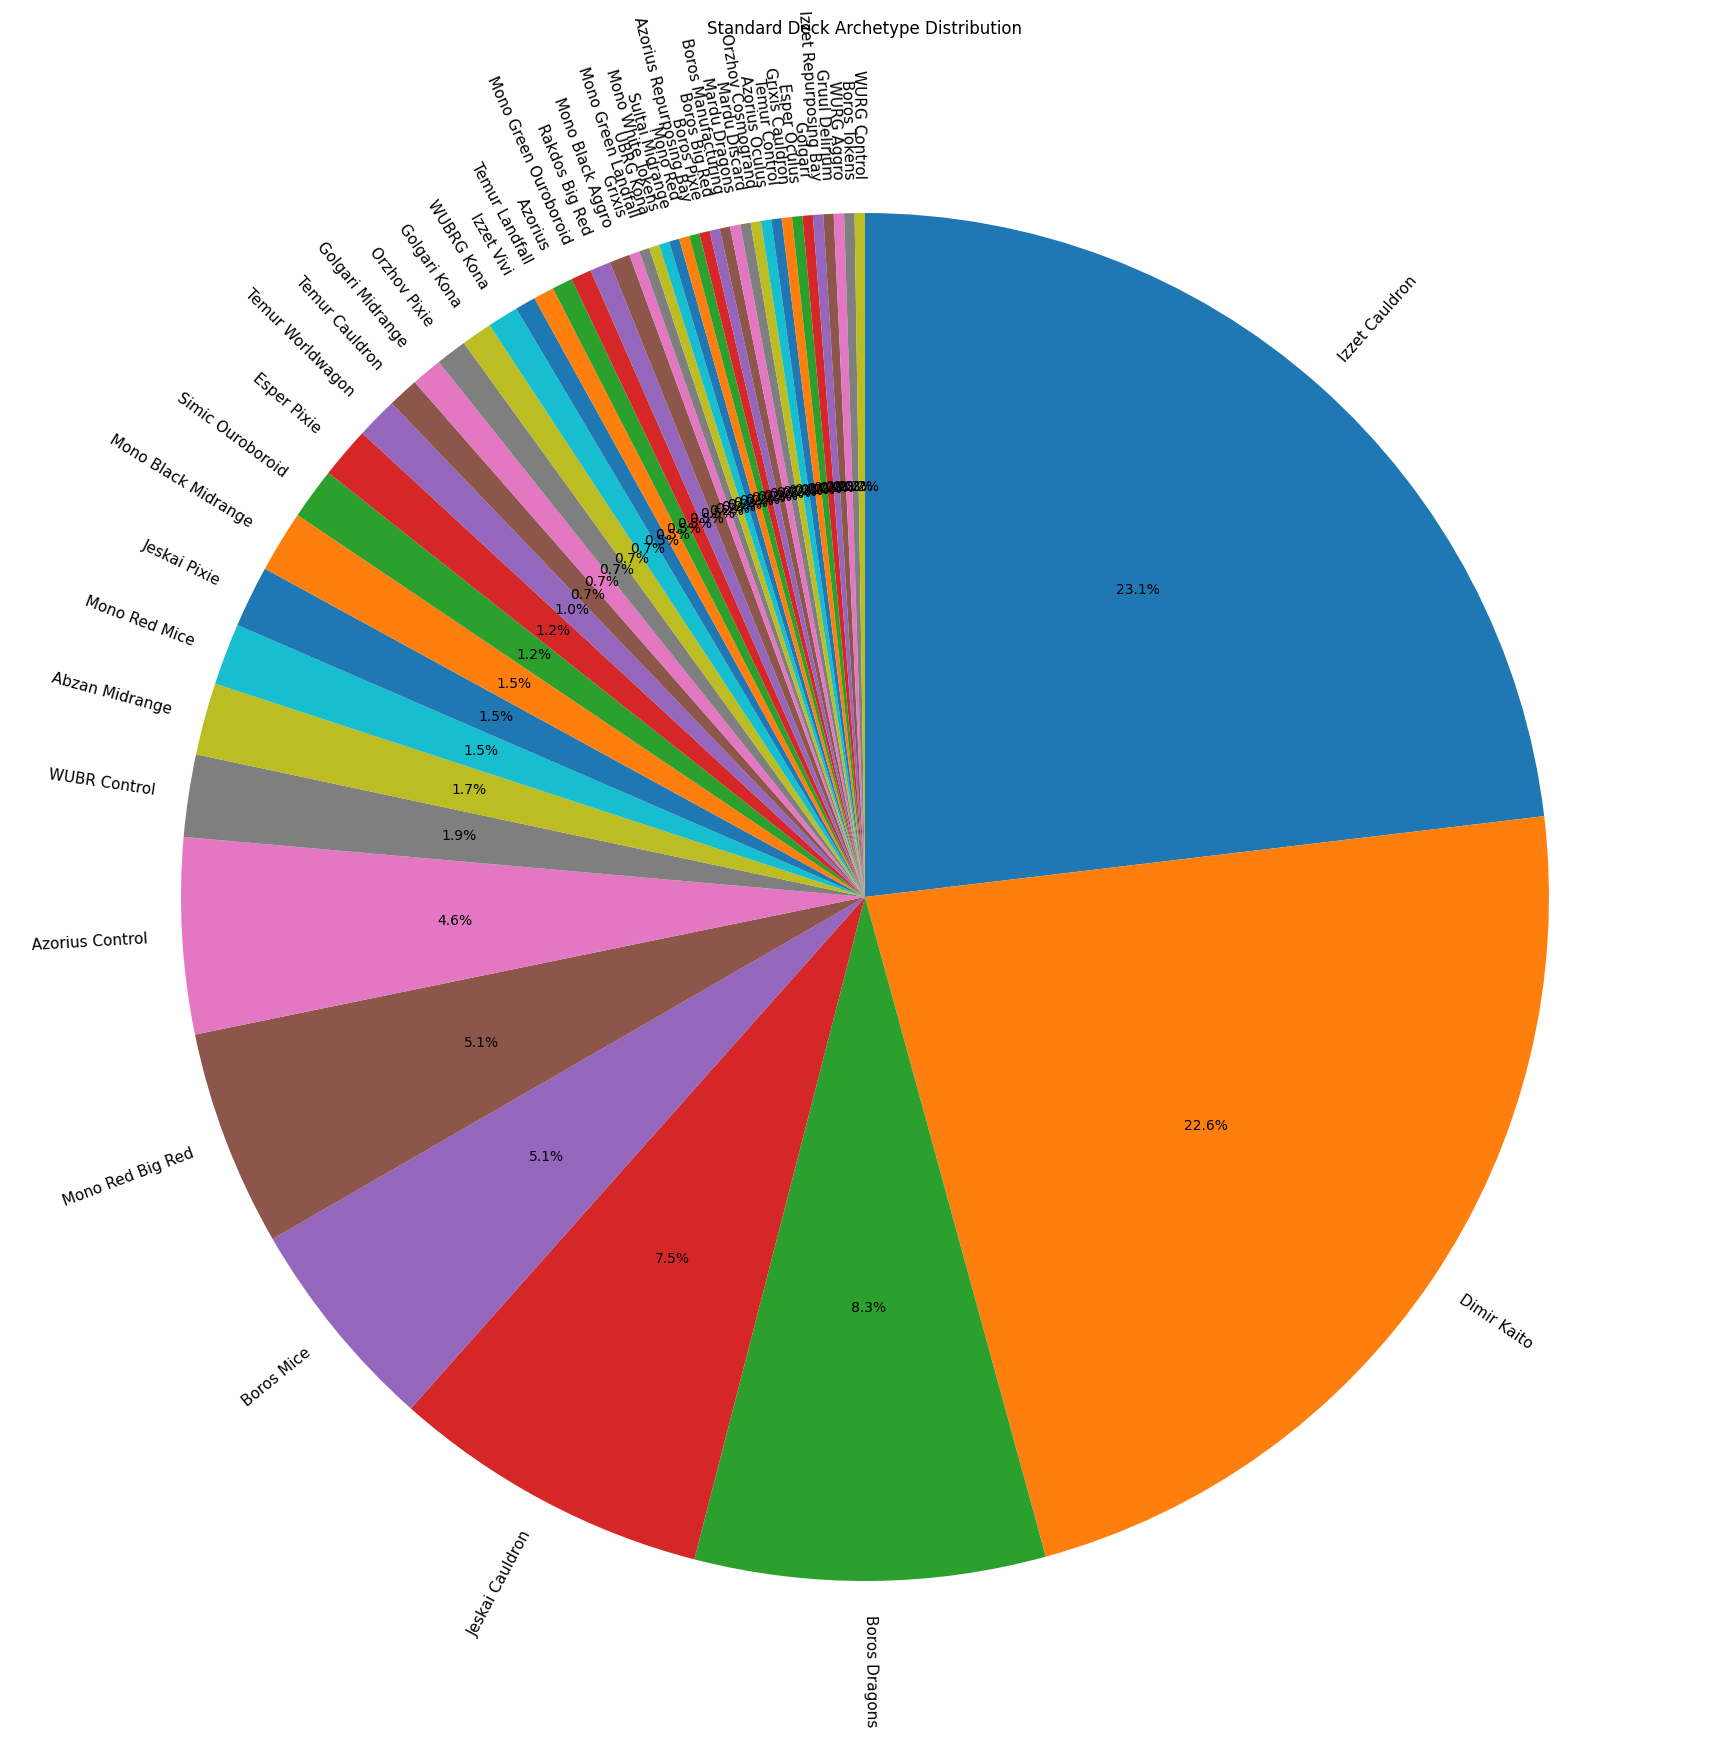

In [2]:
decks = [x.deckName for x in deckList]
deck_series = pd.Series(decks)
deck_counts = deck_series.value_counts()

# Create pie chart
fig, ax = plt.subplots(figsize=(18, 18))
wedges, _, _ = ax.pie(deck_counts, startangle=90, counterclock=False, autopct="%1.1f%%")

# Manually place labels at wedge centers
total = sum(deck_counts)
for i, wedge in enumerate(wedges):
    # Compute center angle of wedge
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)

    # Position label slightly outside the wedge
    x = np.cos(angle_rad)
    y = np.sin(angle_rad)

    # Flip alignment and rotation for left side
    ha = "left" if x >= 0 else "right"
    rotation = angle if x >= 0 else angle + 180

    ax.text(
        x * 1.05,
        y * 1.05,
        deck_counts.index[i],
        ha=ha,
        va="center",
        rotation=rotation,
        rotation_mode="anchor",
        fontsize=11,
    )

plt.title(f"{queryFormat.title()} Deck Archetype Distribution")
plt.tight_layout()
plt.show()


In [3]:
keyCardNum = len([x.deckDf for x in deckList if x.keyCard == []])
print(f"{keyCardNum} deck(s) without any of the specified key cards")
show = keyCardNum
if keyCardNum > 0:
    i = 0
    x = [x for x in deckList if x.keyCard == []][i]
    print(f"{x.deckName}")
    show = x.deckDf[~x.deckDf["type_line"].str.contains("Land")]
show

8 deck(s) without any of the specified key cards
Mono Red 


Main/Side  \
Deck URL                                           Deck               
/decklist/standard-challenge-32-2025-08-2312812160 Deck 5      Main   
                                                   Deck 5      Main   
                                                   Deck 5      Main   
                                                   Deck 5      Main   
                                                   Deck 5      Main   
                                                   Deck 5      Main   
                                                   Deck 5      Main   
                                                   Deck 5      Main   
                                                   Deck 5      Side   
                                                   Deck 5      Side   
                                                   Deck 5      Side   
                                                   Deck 5      Side   
                                                   Deck 5      Main   
                                                   Deck 5      Main   

                                                                           Card Name  \
Deck URL                                           Deck                                
/decklist/standard-challenge-32-2025-08-2312812160 Deck 5                   Boltwave   
                                                   Deck 5            Burst Lightning   
                                                   Deck 5    Hidetsugu's Second Rite   
                                                   Deck 5        Fanatical Firebrand   
                                                   Deck 5                 Hired Claw   
                                                   Deck 5           Lightning Strike   
                                                   Deck 5          Screaming Nemesis   
                                                   Deck 5                Plasma Bolt   
                                                   Deck 5        Razorkin Needlehead   
                                                   Deck 5              Nova Hellkite   
                                                   Deck 5         Overwhelming Surge   
                                                   Deck 5              Sunspine Lynx   
                                                   Deck 5             Grab the Prize   
                                                   Deck 5  Case of the Crimson Pulse   

                                                           Quantity  \
Deck URL                                           Deck               
/decklist/standard-challenge-32-2025-08-2312812160 Deck 5         4   
                                                   Deck 5         4   
                                                   Deck 5         4   
                                                   Deck 5         4   
                                                   Deck 5         4   
                                                   Deck 5         4   
                                                   Deck 5         4   
                                                   Deck 5         4   
                                                   Deck 5         4   
                                                   Deck 5         4   
                                                   Deck 5         3   
                                                   Deck 5         3   
                                                   Deck 5         2   
                                                   Deck 5         2   

                                                           mana_cost  \
Deck URL                                           Deck                
/decklist/standard-challenge-32-2025-08-2312812160 Deck 5        {R}   
                                                   Deck 5        {R}   
                                                   Deck 5     {3}{R}   
               

In [4]:
includedCardList = ["Vivi Ornitier"]
excludedCardList = ["Agatha's Soul Cauldron"]
Queries.avgDecksWithCard(
    deckList, includedCardList, "Main", excludedCardList, "Main", "Main"
)

Card Name
Island                     7.0
Elusive Otter              4.0
Opt                        4.0
Sleight of Hand            4.0
Torch the Tower            4.0
Stock Up                   4.0
Starting Town              4.0
Riverpyre Verge            4.0
Stormchaser's Talent       4.0
Spirebluff Canal           4.0
Into the Flood Maw         3.0
Mountain                   2.0
Wild Ride                  2.0
Vivi Ornitier              2.0
Quantum Riddler            2.0
Abrade                     1.5
Spell Pierce               1.5
Consult the Star Charts    1.0
Get Out                    1.0
Roaring Furnace            1.0
Name: Quantity, dtype: float64

In [5]:
Queries.aggDecksWithCard(
    deckList, [], "Main", [], "Main", "Main"
)

Card Name
Mountain                 1839
Island                   1236
Swamp                     744
Soulstone Sanctuary       702
Riverpyre Verge           634
                         ... 
Thousand Moons Smithy       1
Chandra, Spark Hunter       1
Bramble Familiar            1
Bottomless Pool             1
Valgavoth's Lair            1
Name: Quantity, Length: 400, dtype: int64

In [6]:
Queries.avgArchetype(deckList, "Izzet Vivi", "Main")

Main/Side  \
Deck URL                                           Deck               
/decklist/standard-challenge-32-2025-08-2312812165 Deck 4      Main   
                                                   Deck 4      Main   
                                                   Deck 4      Main   
                                                   Deck 4      Main   
                                                   Deck 4      Main   
                                                   Deck 4      Main   
                                                   Deck 4      Main   
                                                   Deck 4      Main   
                                                   Deck 4      Main   
                                                   Deck 4      Main   
                                                   Deck 4      Main   
                                                   Deck 4      Main   
                                                   Deck 4      Main   
                                                   Deck 4      Main   
                                                   Deck 4      Main   
                                                   Deck 4      Main   
                                                   Deck 4      Main   
                                                   Deck 4      Main   
                                                   Deck 4      Main   
                                                   Deck 4      Main   
/decklist/standard-showcase-qualifier-2025-08-2... Deck 2      Main   
                                                   Deck 2      Main   
                                                   Deck 2      Main   
                                                   Deck 2      Main   
                                                   Deck 2      Main   
                                                   Deck 2      Main   
                                                   Deck 2      Main   
                                                   Deck 2      Main   
                                                   Deck 2      Main   
                                                   Deck 2      Main   
                                                   Deck 2      Main   
                                                   Deck 2      Main   
                                                   Deck 2      Main   
                                                   Deck 2      Main   
                                                   Deck 2      Main   
                                                   Deck 2      Main   
                                                   Deck 2      Main   
                                                   Deck 2      Main   
                                                   Deck 2      Main   
                                                   Deck 2      Main   

                                                                         Card Name  \
Deck URL                                           Deck                              
/decklist/standard-challenge-32-2025-08-2312812165 Deck 4                   Island   
                                                   Deck 4            Elusive Otter   
                                                   Deck 4                      Opt   
                                                   Deck 4                 Stock Up   
                                                   Deck 4         Spirebluff Canal   
                                                   Deck 4            Starting Town   
                                                   Deck 4          Sleight of Hand   
                                                   Deck 4          Riverpyre Verge   
                                                   Deck 4          Torch the Tower   
                                                   Deck 4     Stormchaser's Talent   
                                           

In [10]:
[deck.deckId
for deck in deckList
if "Vivi Ornitier" in deck.uniqueCards['Main']
if "Agatha's Soul Cauldron" not in deck.uniqueCards['Main']
]

[('/decklist/standard-challenge-32-2025-08-2312812165', 'Deck 4'),
 ('/decklist/standard-showcase-qualifier-2025-08-2412812132', 'Deck 2')]